In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [190]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [191]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [192]:
df.shape

(1000, 8)

In [193]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no  missing values


In [194]:
df.duplicated().sum()

0

There are no duplicates values in the data set

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [196]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [197]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
1. From above description of numerical data, all means are very close to each other - between 66 and 68.05;
2. All standard deviations are also close - between 14.6 and 15.19;
3. While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 1

In [198]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [199]:
print("Categories in 'gender' variable are : ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethinicity' variable are : ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable are : ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable are : ", end=" ")
print(df['lunch'].unique())

print("Categories in '	test preparation course' variable are : ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' variable are :  ['female' 'male']
Categories in 'race/ethinicity' variable are :  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable are :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable are :  ['standard' 'free/reduced']
Categories in '	test preparation course' variable are :  ['none' 'completed']


In [200]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categoric_features = [feature for feature in df.columns if df[feature].dtype == 'object']

print("There are {} numeric features : {}".format(len(numeric_features), numeric_features))
print("There are {} categoric features : {}".format(len(categoric_features), categoric_features))

There are 3 numeric features : ['math score', 'reading score', 'writing score']
There are 5 categoric features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [201]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [202]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [203]:
reading_full = df[df['reading score'] == 100]['reading score'].count()
writing_full = df[df['writing score'] == 100]['writing score'].count()
math_full = df[df['math score'] == 100]['math score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [204]:
reading_less_20 = df[df['reading score'] <= 20]['reading score'].count()
writing_less_20 = df[df['writing score'] <= 20]['writing score'].count()
math_less_20 = df[df['math score'] <= 20]['math score'].count()

print(f'Number of students with full marks in Maths: {math_less_20}')
print(f'Number of students with full marks in Writing: {writing_less_20}')
print(f'Number of students with full marks in Reading: {reading_less_20}')

Number of students with full marks in Maths: 4
Number of students with full marks in Writing: 3
Number of students with full marks in Reading: 1


Insights
1. From above values we get students have performed the worst in Maths
2. Best performance is in reading section

## Histogram

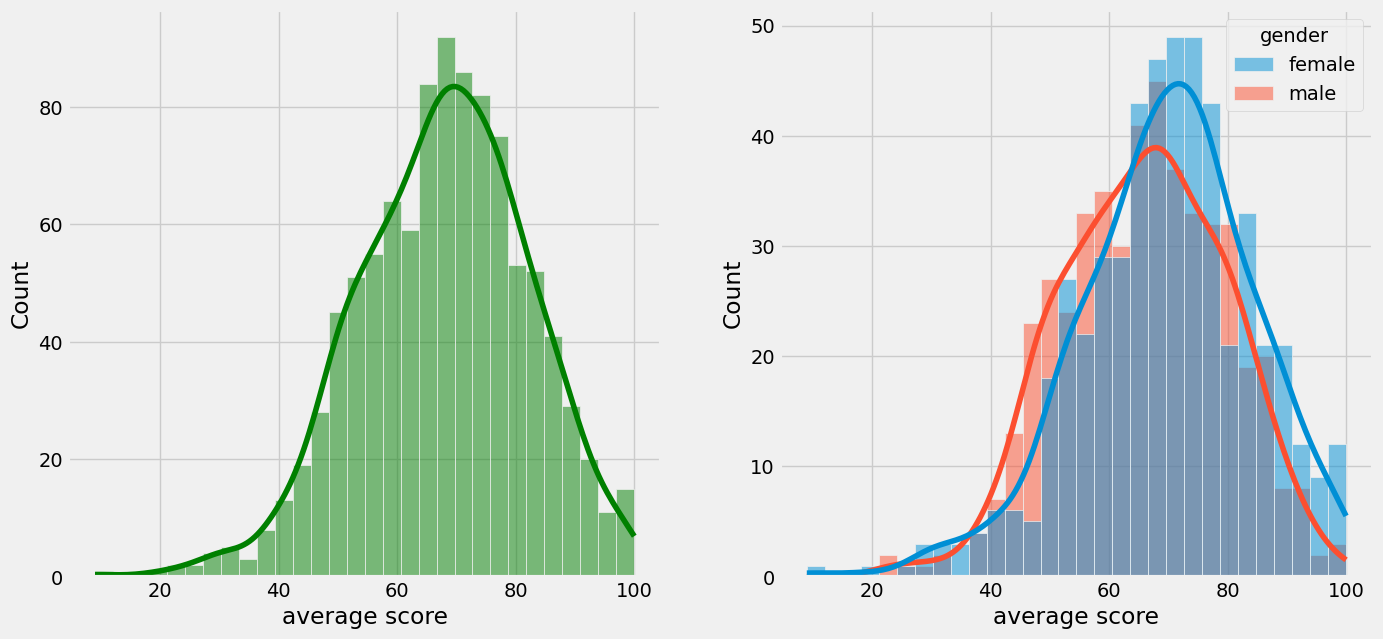

In [205]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average score', kde=True, bins=30, color='green')
plt.subplot(122)
sns.histplot(data=df, x='average score', kde=True, bins=30, hue='gender')
plt.show()

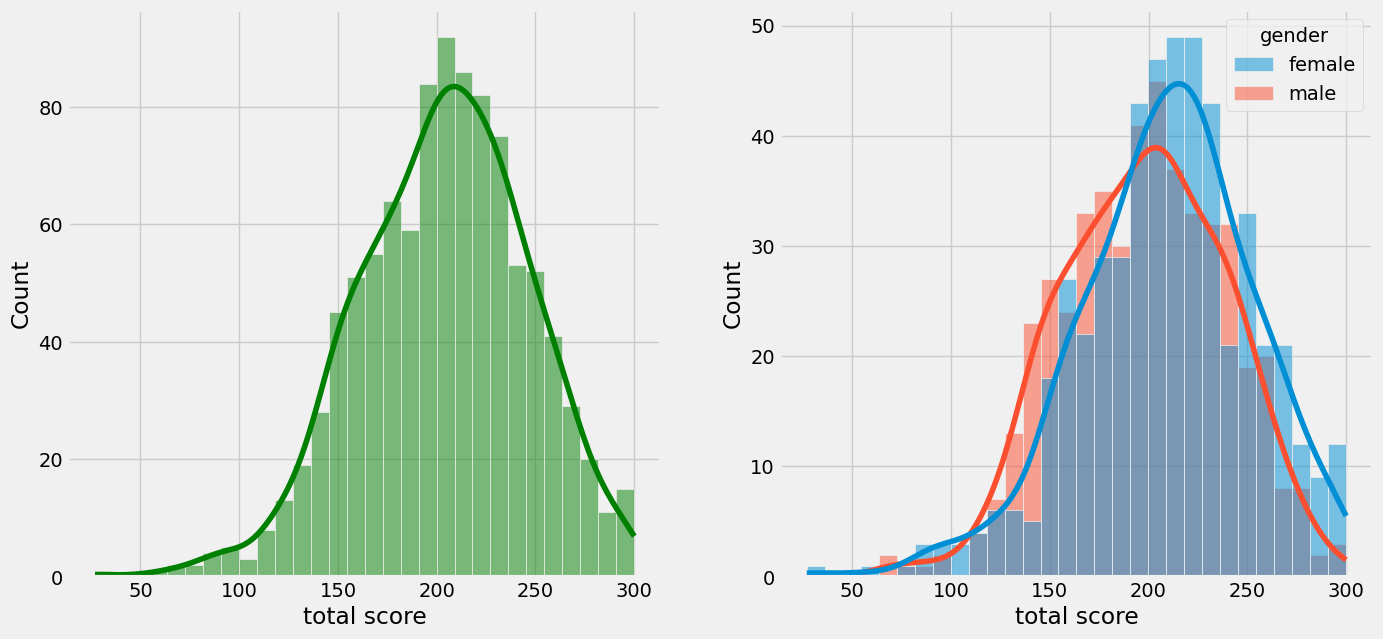

In [206]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', kde=True, bins=30, color='green')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, bins=30, hue='gender')
plt.show()

Insights
1. Female students tend to perform well then male students.

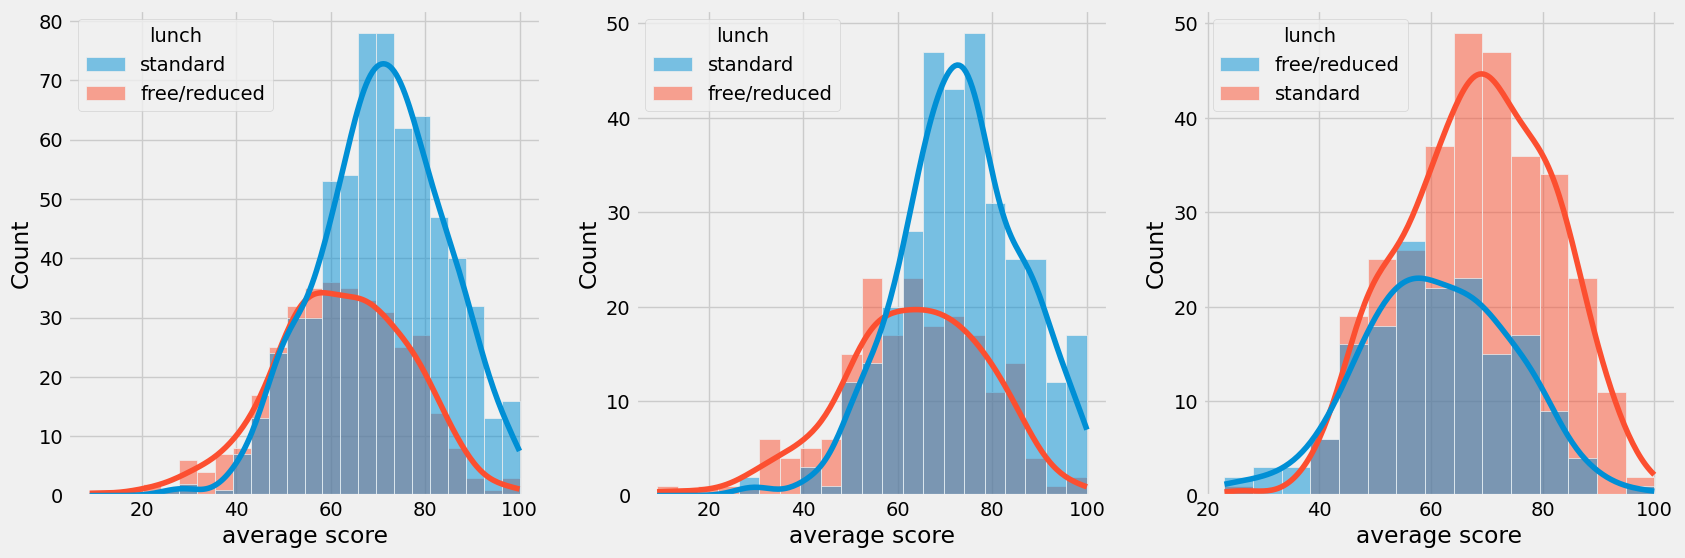

In [207]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average score', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average score', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average score', kde=True, hue='lunch')
plt.show()

Insights
1. Standard lunch helps perform well in exams.
2. Standard lunch helps perform well in exams be it a male or a female.

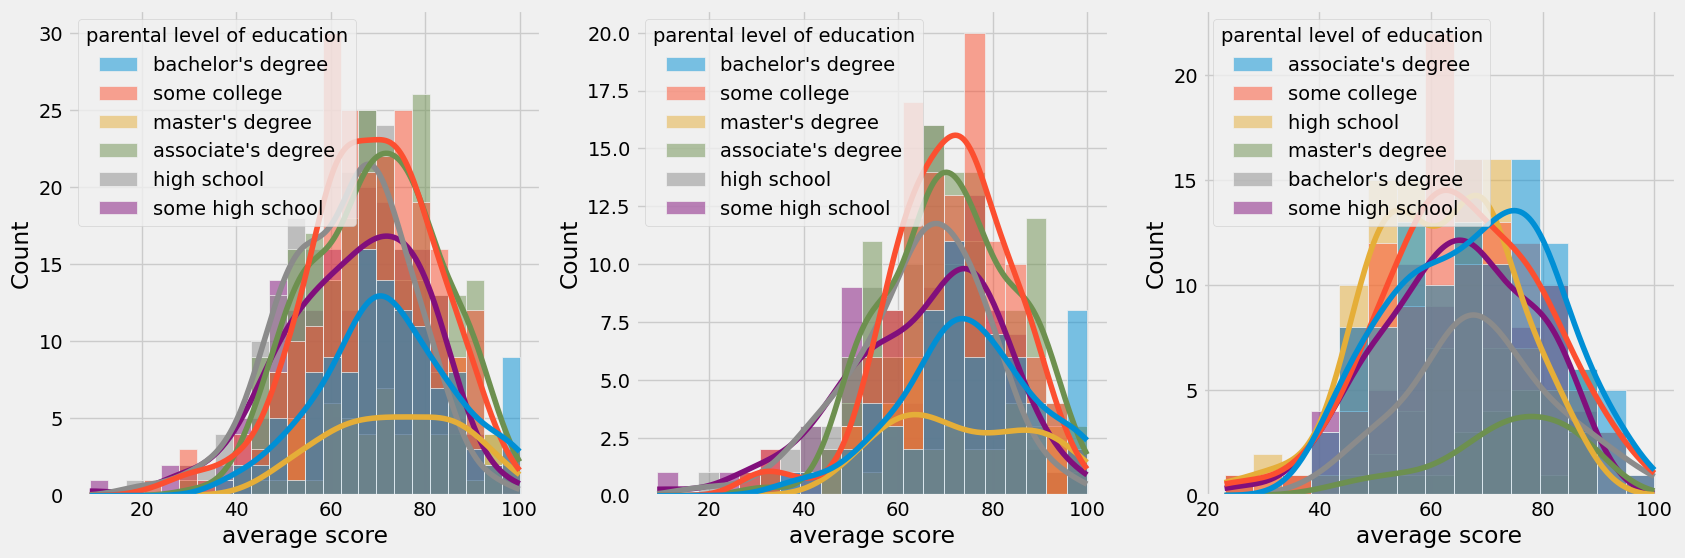

In [208]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average score', kde=True, hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average score', kde=True, hue='parental level of education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average score', kde=True, hue='parental level of education')
plt.show()

In general parent's education don't help student perform well in exam.
1. 3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
2. 2nd plot we can see there is no effect of parent's education on female students.

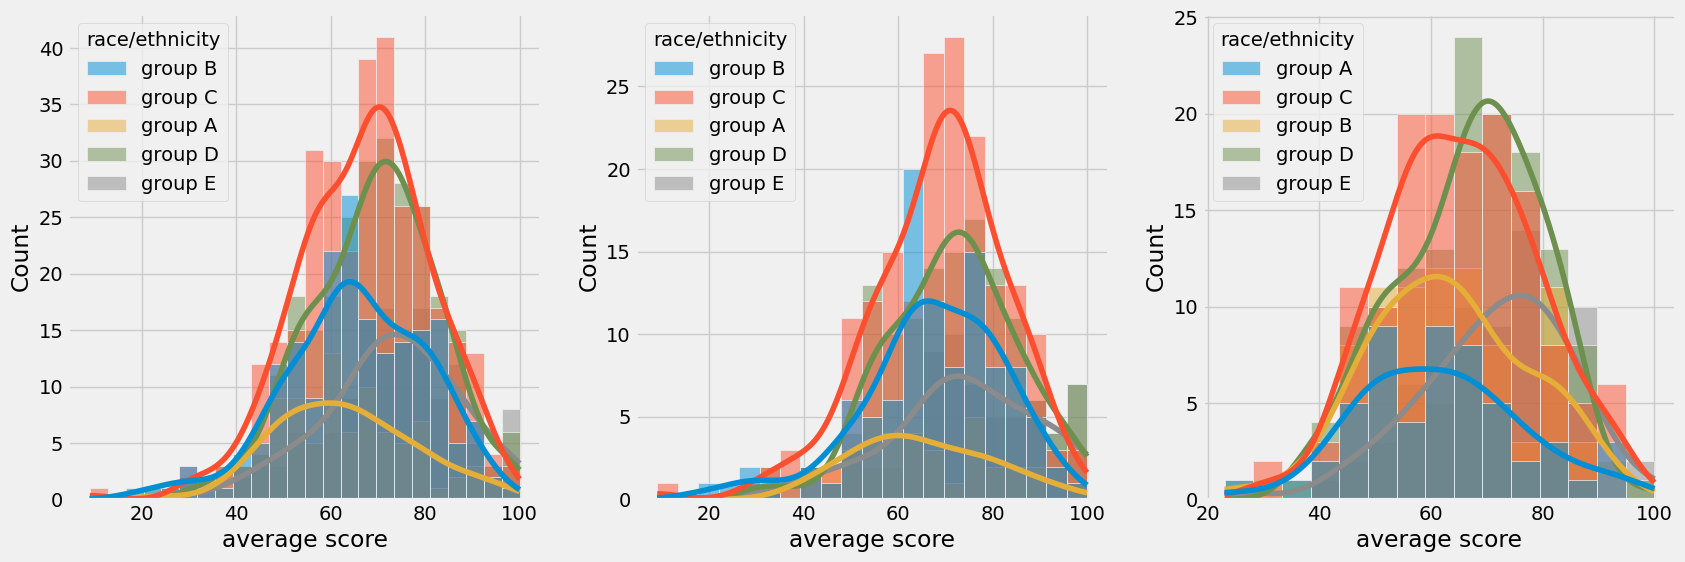

In [209]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average score', kde=True, hue='race/ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average score', kde=True, hue='race/ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average score', kde=True, hue='race/ethnicity')
plt.show()

Insights
1. Students of group A and group B tends to perform poorly in exam.
2. Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

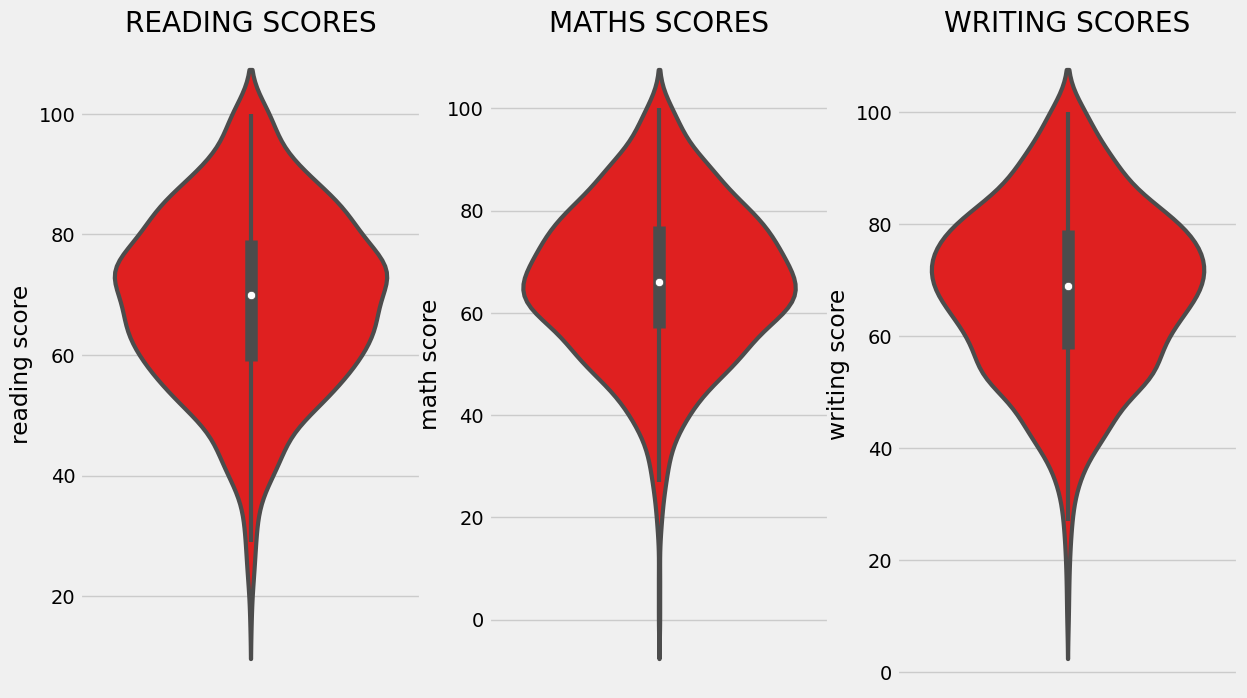

In [210]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('READING SCORES')
sns.violinplot(data=df, y='reading score', color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('MATHS SCORES')
sns.violinplot(data=df, y='math score', color='red', linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(data=df, y='writing score', color='red', linewidth=3)
plt.show()

Insights
1. From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

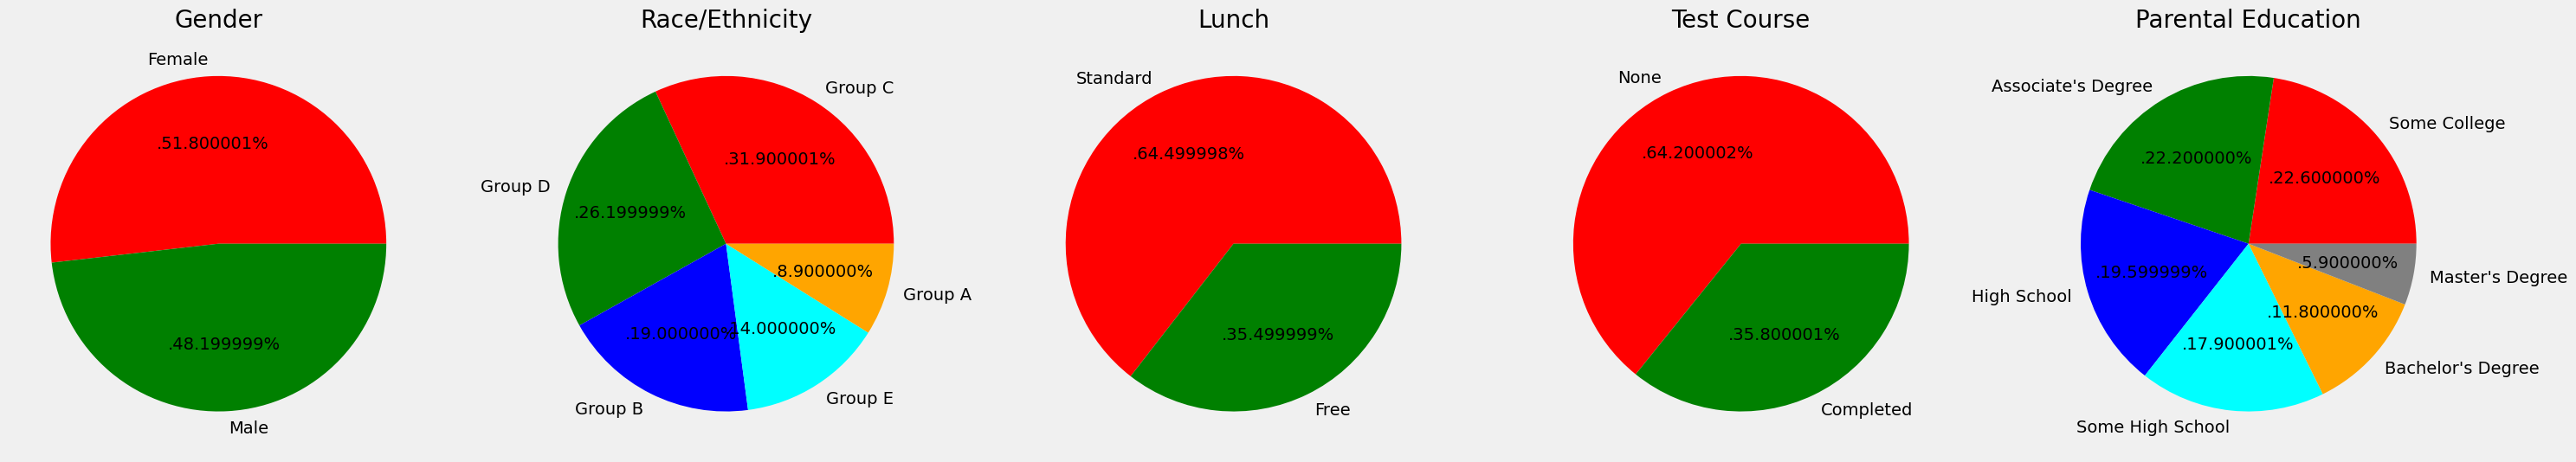

In [211]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights
1. Number of Male and Female students is almost equal
2. Number students are greatest in Group C
3. Number of students who have standard lunch are greater
4. Number of students who have not enrolled in any test preparation course is greater
5. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

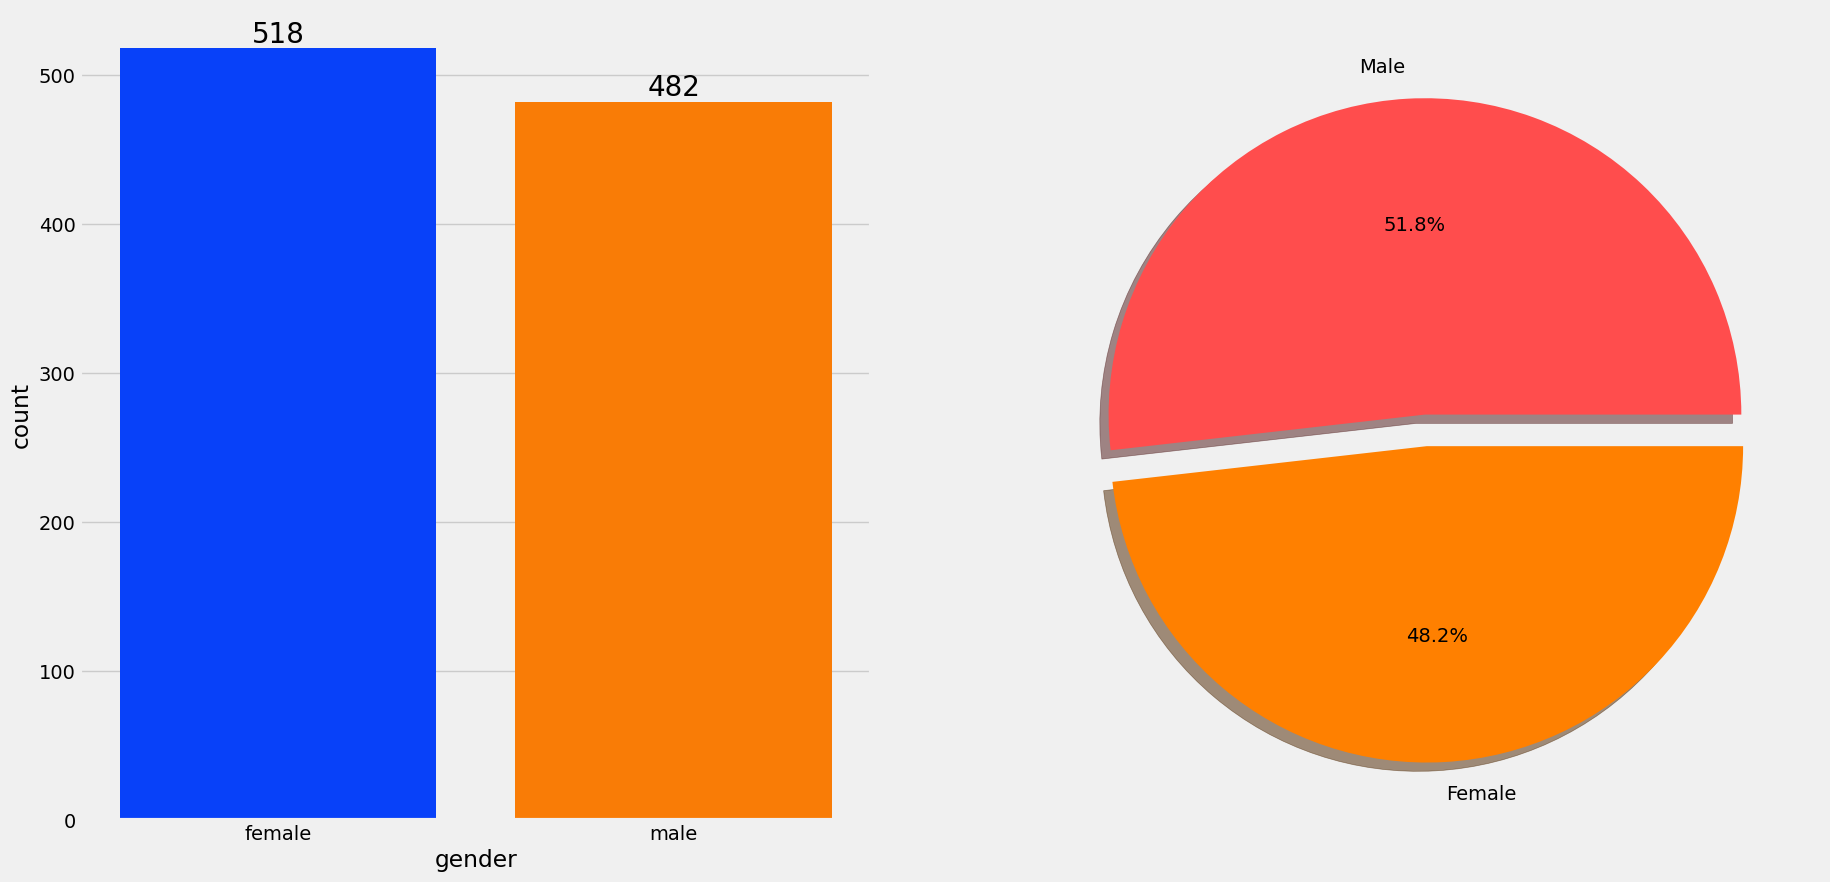

In [212]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights
1. Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

In [213]:
gender_group = df.groupby('gender')
gender_group.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
5,female,group B,associate's degree,standard,none,71,83,78,232,77.333333
6,female,group B,some college,standard,completed,88,95,92,275,91.666667
7,male,group B,some college,free/reduced,none,40,43,39,122,40.666667
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.000000
10,male,group C,associate's degree,standard,none,58,54,52,164,54.666667


In [214]:
# plt.figure(figsize=(10, 8))

# X = ['Total Average','Math Average']


# female_scores = [gender_group['average score'][0], gender_group['math score'][0]]
# male_scores = [gender_group['average score'][1], gender_group['math score'][1]]

# X_axis = np.arange(len(X))
  
# plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
# plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
# plt.xticks(X_axis, X)
# plt.ylabel("Marks")
# plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
# plt.legend()
# plt.show()

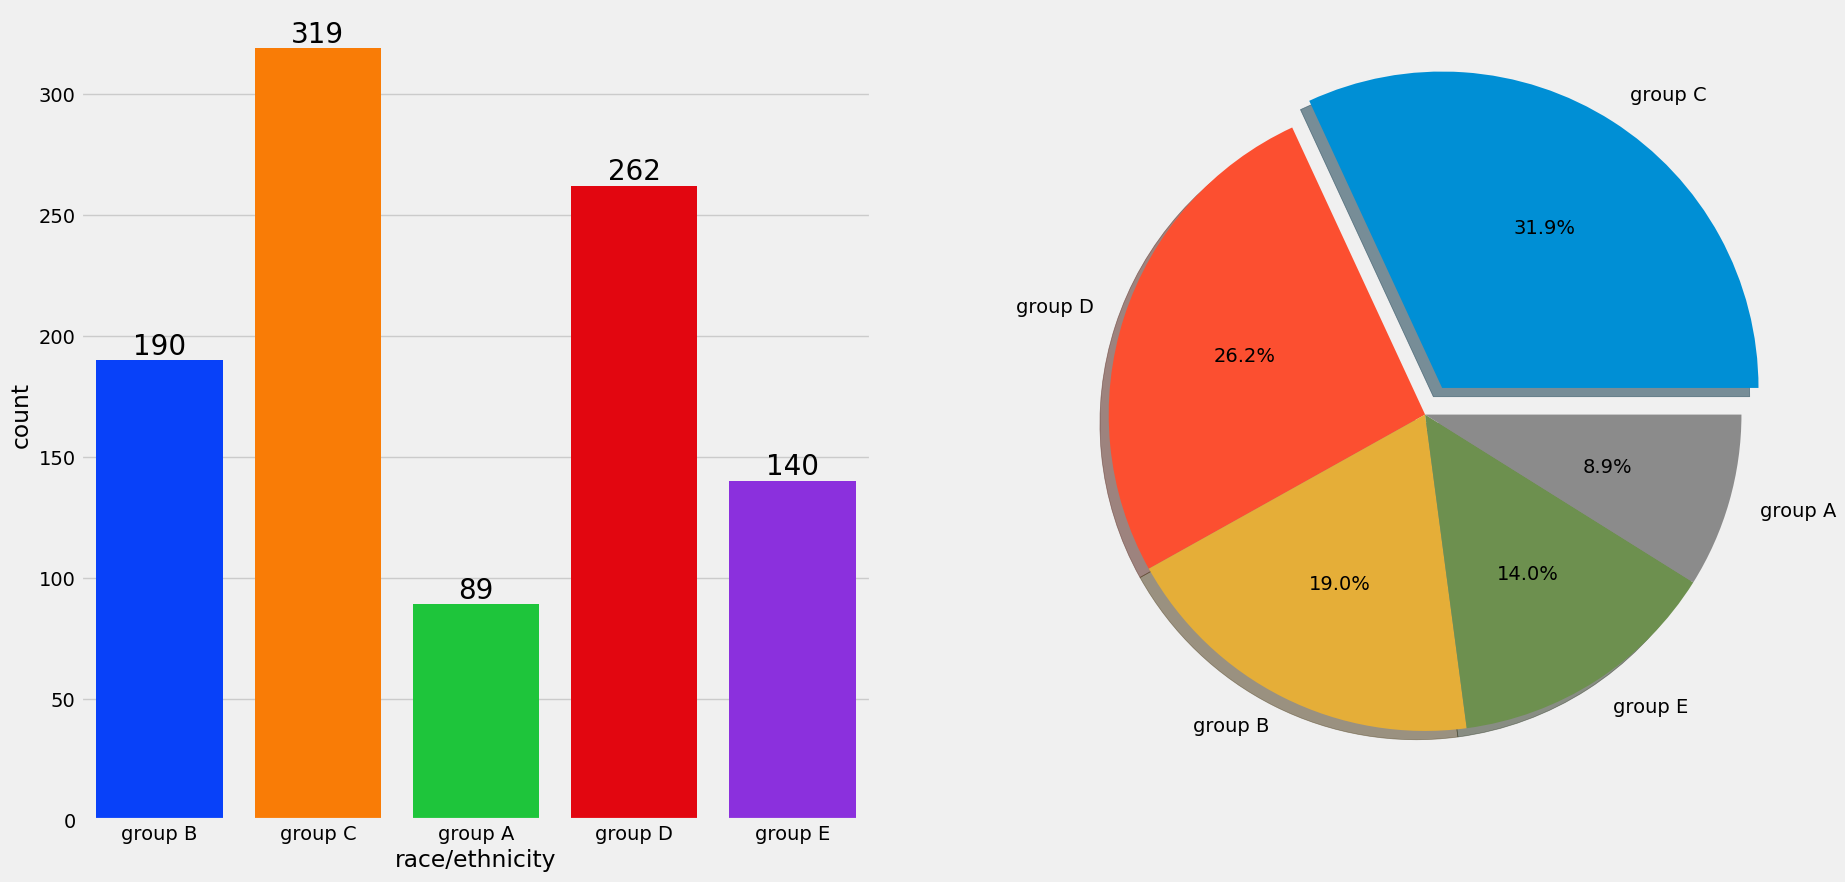

In [215]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

Insights
1. Most of the student belonging from group C /group D.
2. Lowest number of students belong to groupA

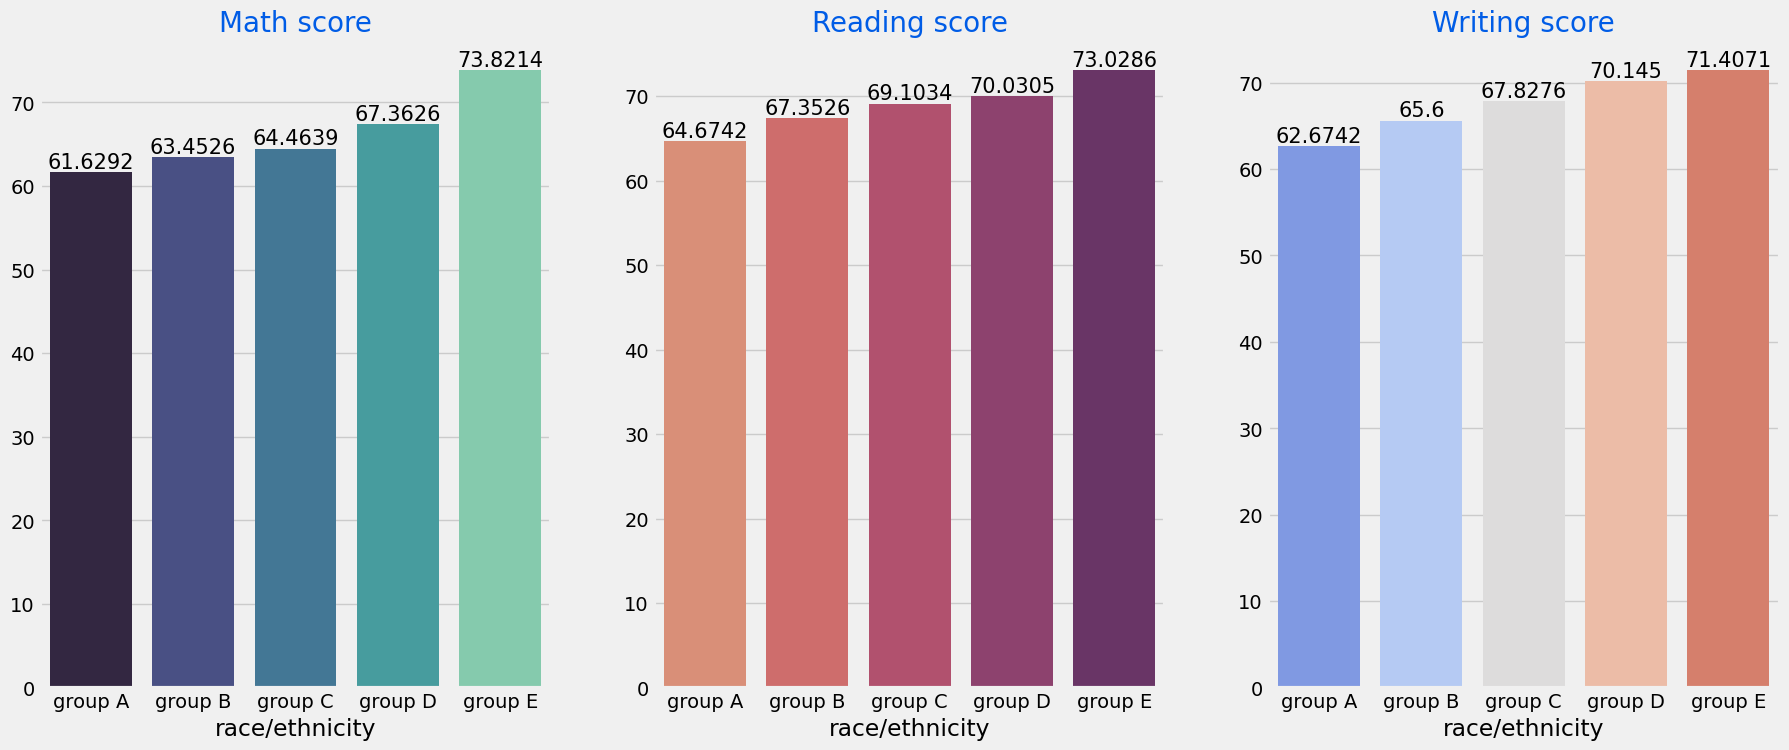

In [216]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights
1. Group E students have scored the highest marks.
2. Group A students have scored the lowest marks

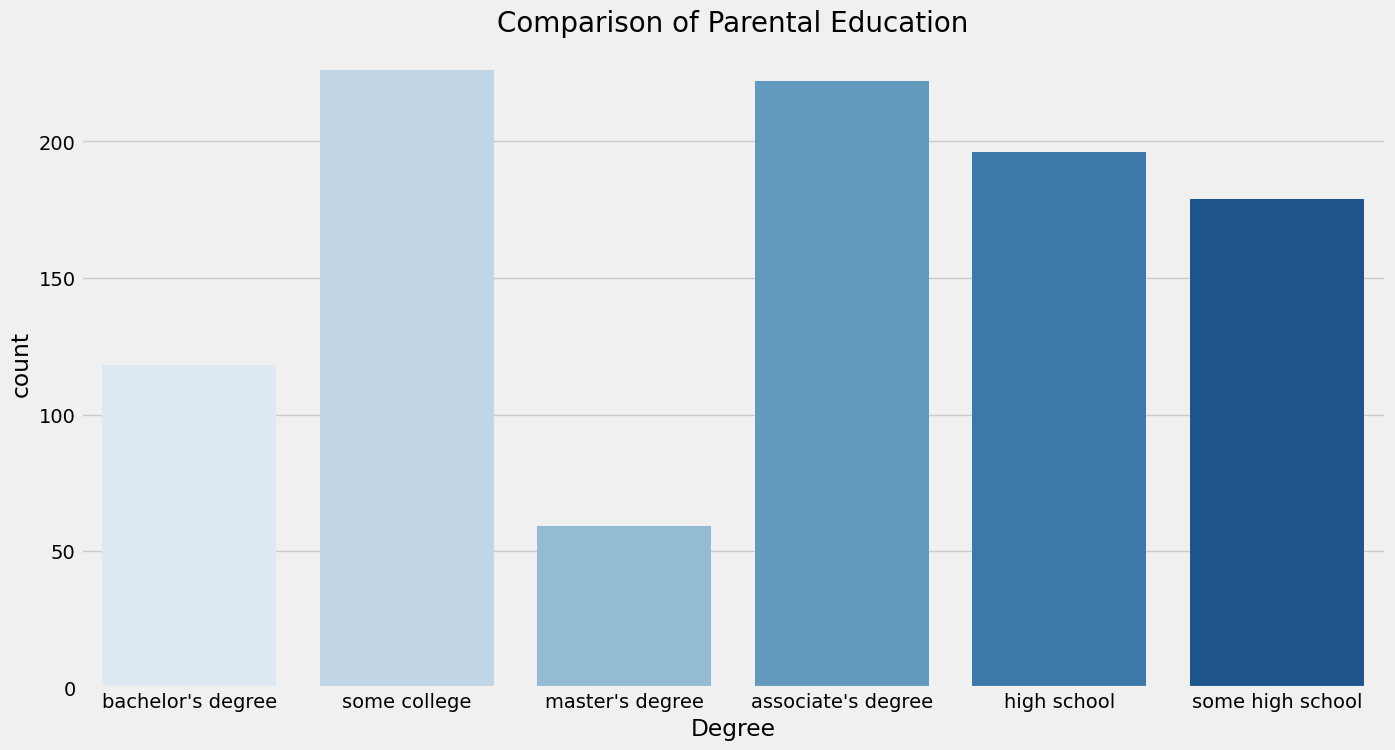

In [217]:
plt.rcParams['figure.figsize']=(15,8)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental level of education'], palette='Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

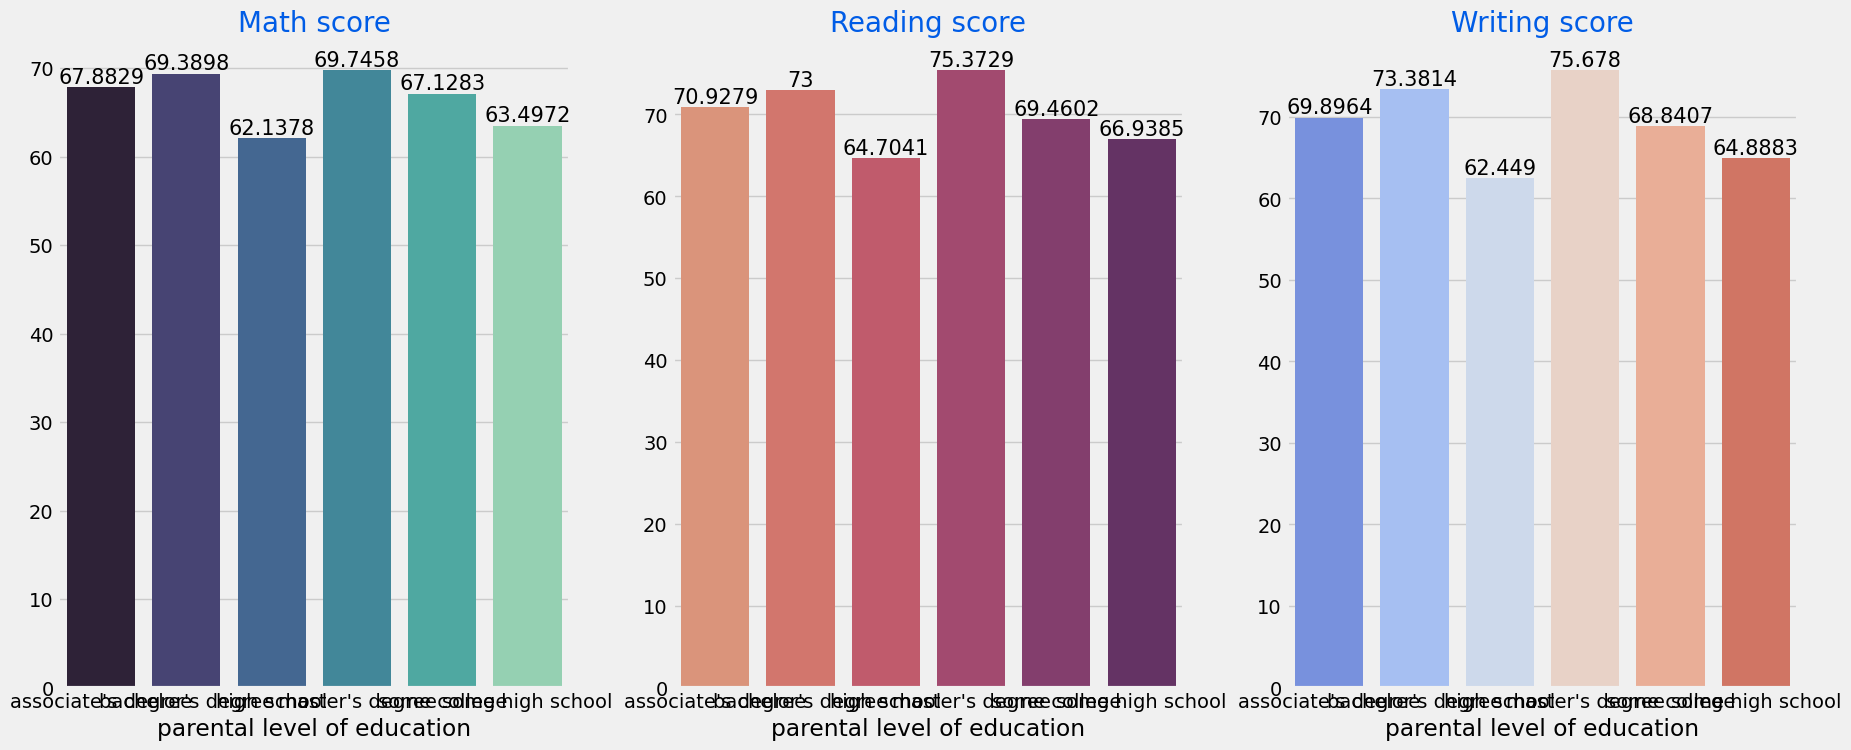

In [218]:
Group_data2=df.groupby('parental level of education')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)


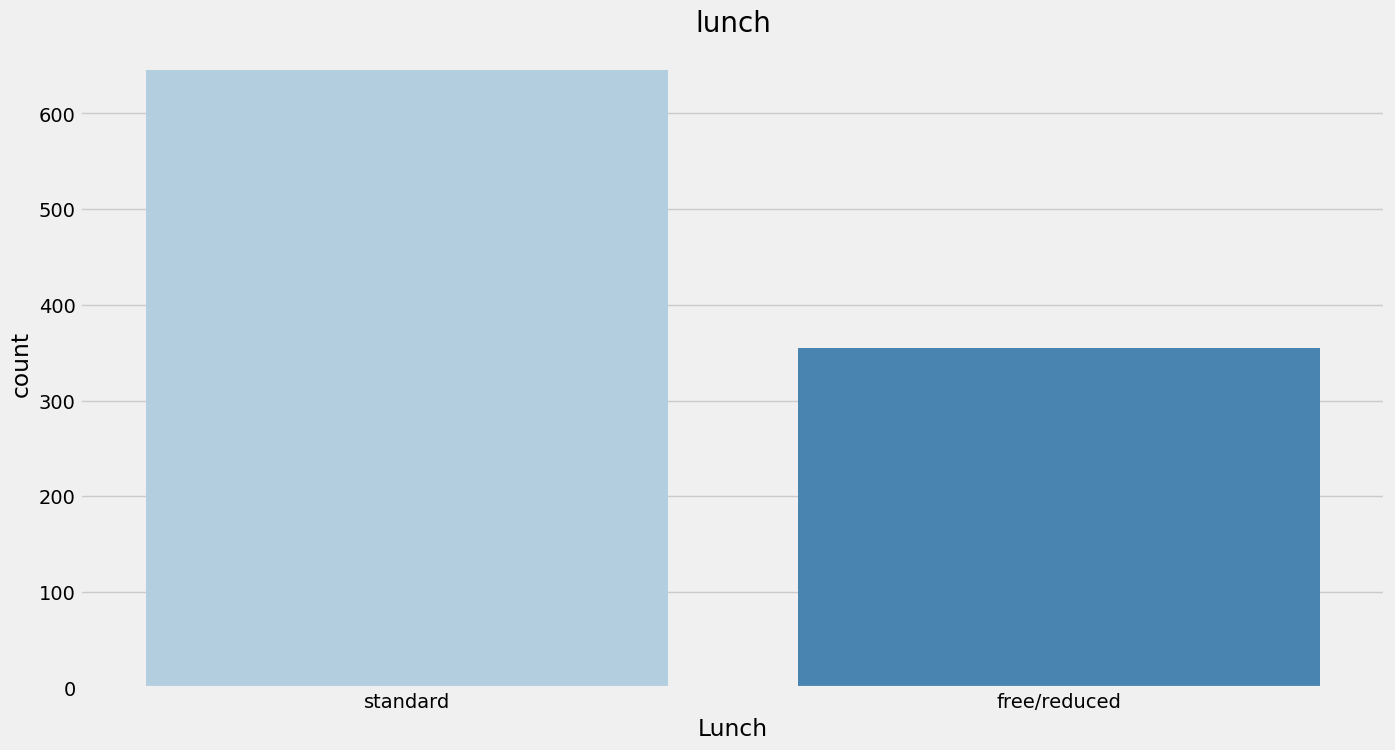

In [219]:
plt.rcParams['figure.figsize']=(15,8)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['lunch'], palette='Blues')
plt.title('lunch', fontweight = 30, fontsize = 20)
plt.xlabel('Lunch')
plt.ylabel('count')
plt.show()

Insights
1. Students being served Standard lunch was more than free lunch

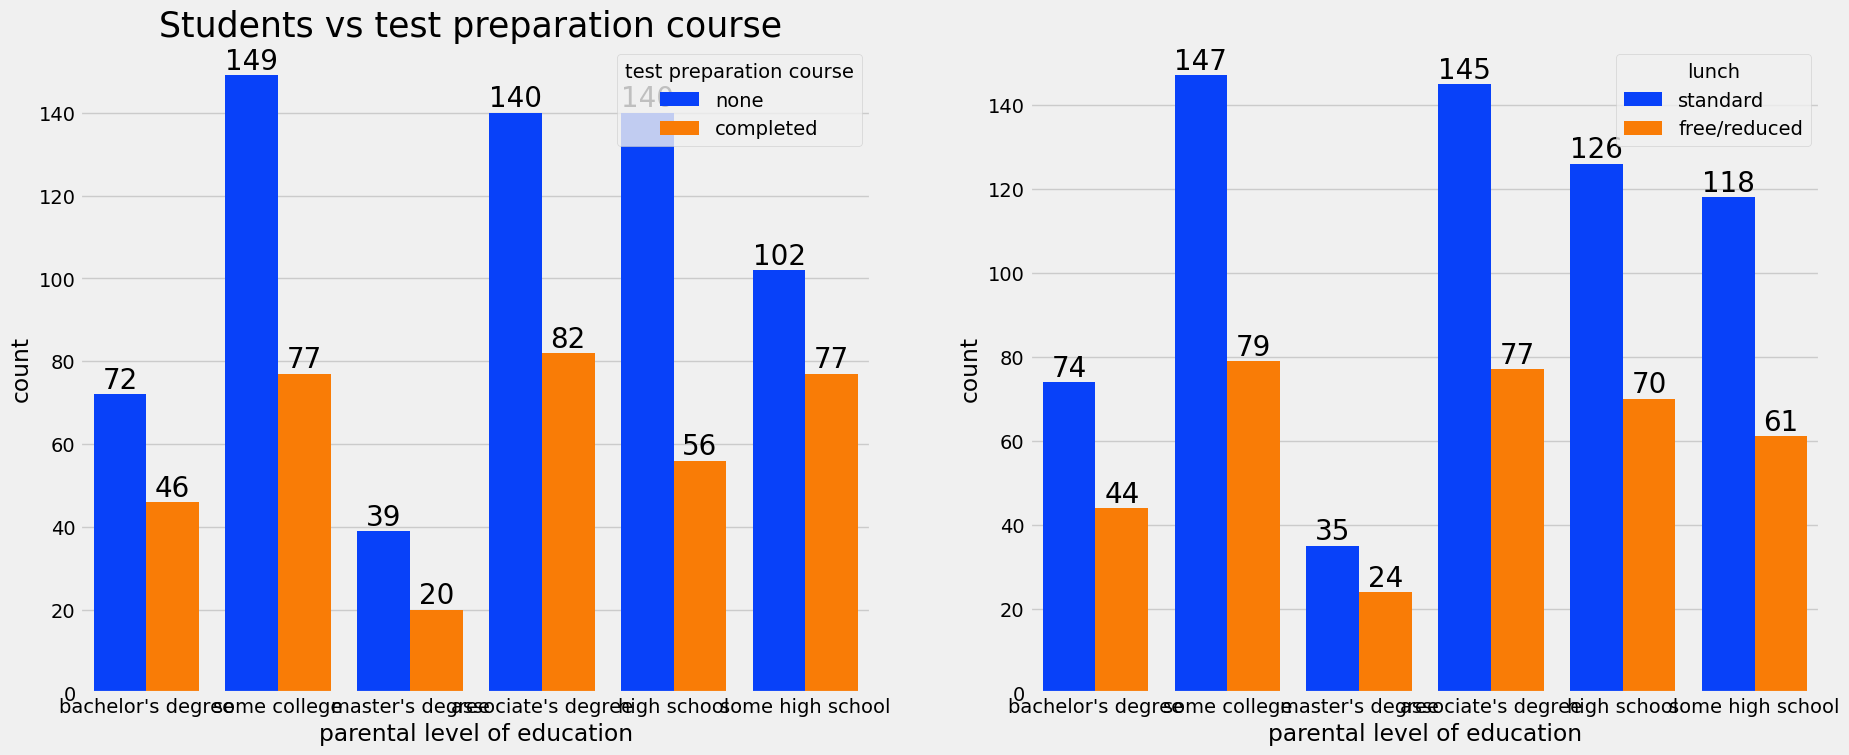

In [220]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)  

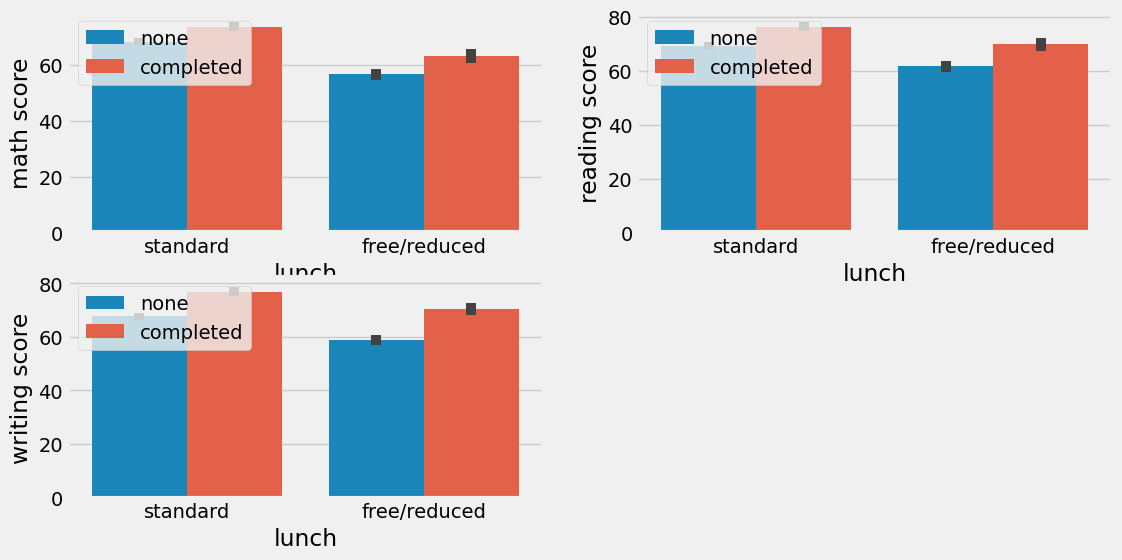

In [221]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.legend(loc=2)
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.legend(loc=2)
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.legend(loc=2)
plt.show()

Insights
1. Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

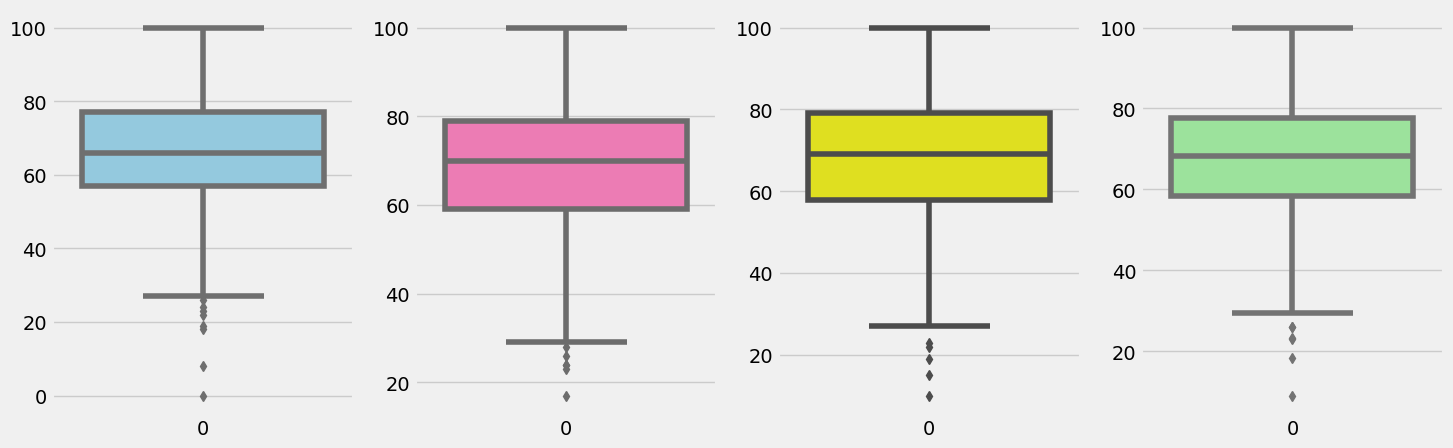

In [222]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average score'],color='lightgreen')
plt.show()

Finding Outliers

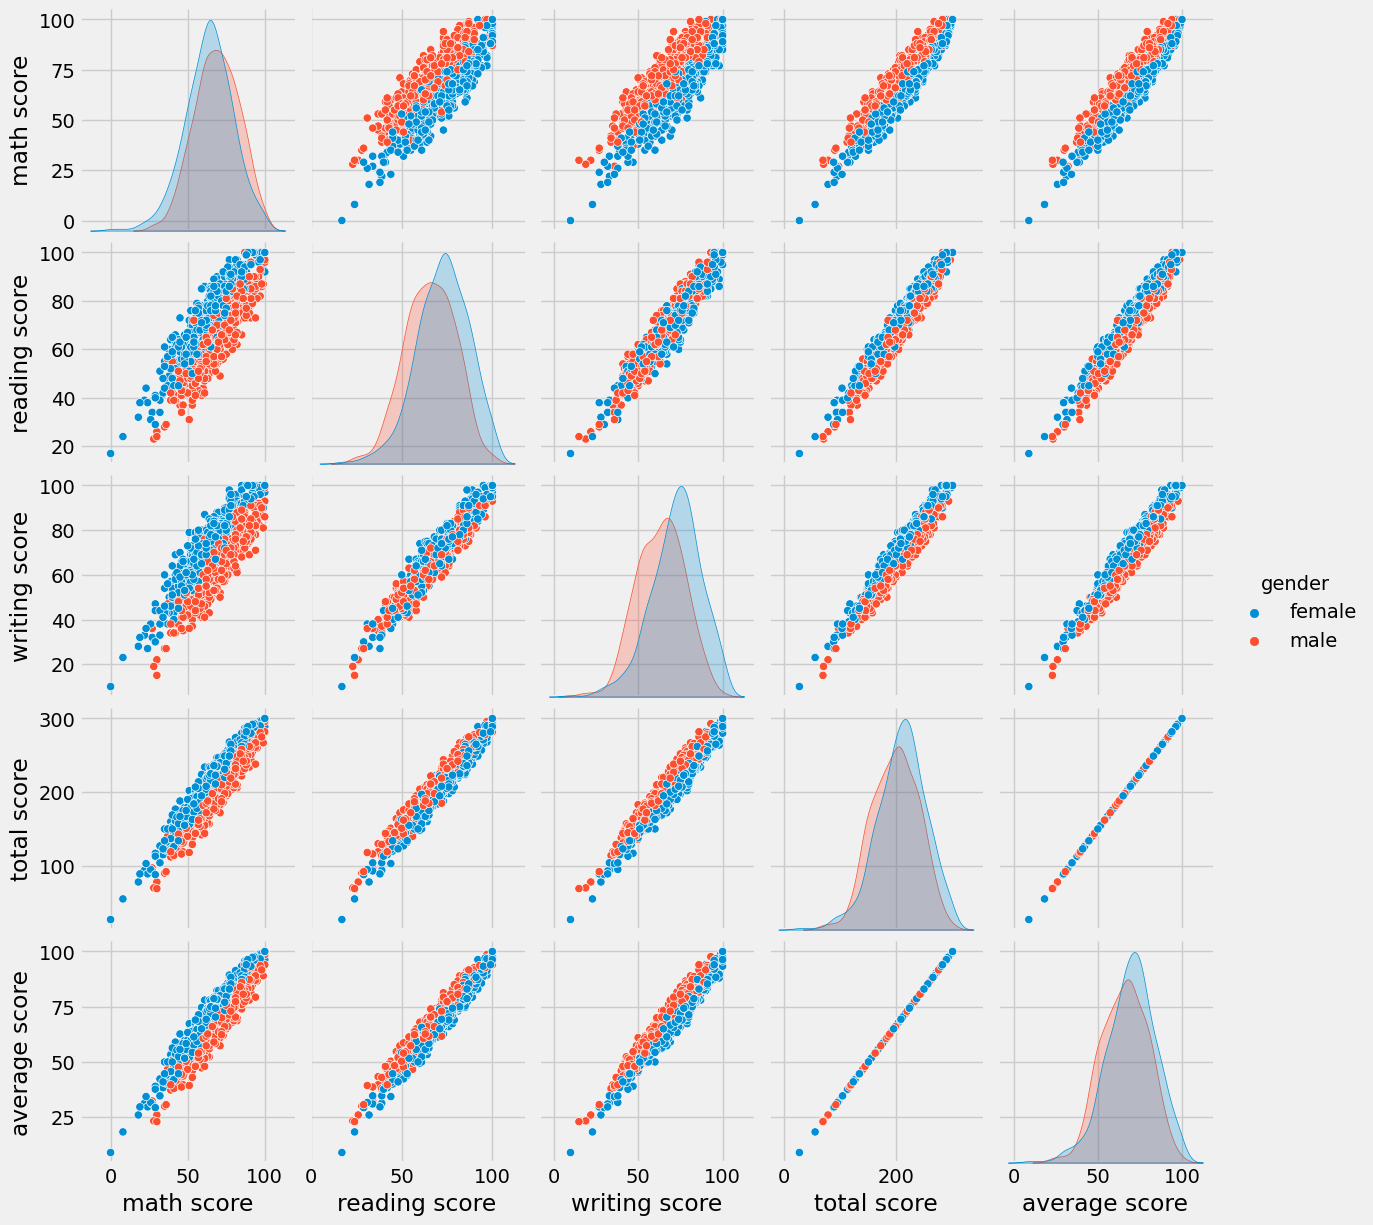

In [223]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights
1. From the above plot it is clear that all the scores increase linearly with each other.

##  Conclusions
1. Student's Performance is related with lunch, race, parental level education
2. Females lead in pass percentage and also are top-scorers
3. Student's Performance is not much related with test preparation course
4. Finishing preparation course is benefitial.